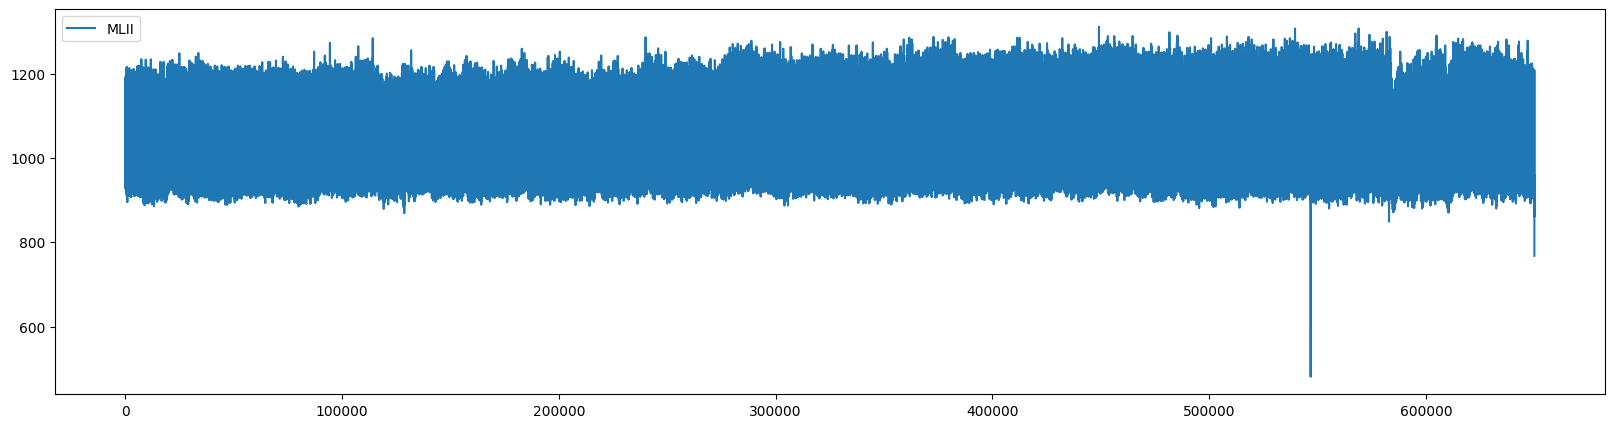

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import operator

filename = "100.csv"
df = pd.read_csv(filename)
plt.figure(figsize=(20,5))
y = df['MLII'].values
plt.plot(y, label='MLII')
plt.legend()
# plt.plot(df['V5'].values[:100])
plt.show()

In [34]:
filename='100annotations.txt'

f = open(filename, 'rb')
next(f) # skip first line!

annotations = []
for line in f:
    annotations.append(line)

In [35]:
size_RR_max = 20
peaks = []
for a in annotations:
    aS = a.split()
    pos = int(aS[1])
    peaks.append(pos)

In [36]:
def calculate_rr_intervals(peaks):
    rr_intervals = []
    for i in range(1, len(peaks)):
        rr_interval = peaks[i] - peaks[i-1]
        rr_intervals.append(rr_interval)
    return rr_intervals

rr_intervals = calculate_rr_intervals(peaks)
rr_intervals = rr_intervals[1:]
rr_intervals

[293,
 292,
 284,
 285,
 284,
 294,
 235,
 358,
 304,
 292,
 284,
 278,
 302,
 308,
 296,
 298,
 296,
 286,
 287,
 285,
 296,
 313,
 296,
 283,
 285,
 279,
 283,
 292,
 294,
 298,
 304,
 290,
 279,
 288,
 284,
 309,
 303,
 297,
 289,
 301,
 285,
 284,
 295,
 304,
 317,
 296,
 280,
 289,
 292,
 287,
 301,
 299,
 297,
 292,
 284,
 281,
 291,
 303,
 300,
 299,
 290,
 280,
 287,
 281,
 285,
 308,
 305,
 296,
 282,
 283,
 283,
 294,
 292,
 306,
 300,
 292,
 282,
 278,
 283,
 289,
 303,
 297,
 292,
 280,
 288,
 284,
 288,
 294,
 309,
 299,
 283,
 282,
 285,
 299,
 297,
 299,
 299,
 296,
 287,
 280,
 286,
 293,
 309,
 305,
 292,
 286,
 283,
 287,
 292,
 297,
 305,
 307,
 291,
 276,
 288,
 289,
 294,
 301,
 295,
 298,
 287,
 281,
 280,
 293,
 296,
 311,
 299,
 284,
 283,
 289,
 285,
 295,
 299,
 302,
 295,
 278,
 271,
 286,
 295,
 293,
 301,
 296,
 282,
 268,
 299,
 281,
 299,
 311,
 296,
 289,
 280,
 283,
 288,
 287,
 293,
 305,
 297,
 279,
 274,
 281,
 278,
 297,
 298,
 287,
 283,
 284,
 280

In [38]:
rr_intervals[:3]

[293, 292, 284]

In [ ]:
count = 0
for val in rr_intervals[:3]:
    if val>300:
        print('Tachycardia')
        count = count+1
    else:
        print ('Normal')

if count>3:
    print ('Send Message')

In [31]:
def calculate_heart_rate(rr_intervals, sampling_rate):
    # Calculate average RR interval
    avg_rr_interval = sum(rr_intervals) / len(rr_intervals)
    
    # Calculate heart rate
    heart_rate = 60 / (avg_rr_interval / sampling_rate)
    
    return heart_rate

# Example sampling rate (samples per second)
sampling_rate = 360

# Calculate heart rate
heart_rate = calculate_heart_rate(rr_intervals, sampling_rate)


In [32]:
heart_rate

75.51029828561933

In [ ]:
def classify_rhythm(heart_rate):
    if heart_rate < 60:
        return "Bradycardia"
    elif heart_rate >= 60 and heart_rate <= 100:
        return "Normal Sinus Rhythm"
    else:
        return "Tachycardia"


# Classify ECG rhythm based on heart rate
rhythm = classify_rhythm(hr)

# Display the result
print(f"ECG Rhythm: {rhythm}")
